In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [84]:
file_url = "../data/adult.csv"
df = pd.read_csv(file_url)
df.rename(columns={"Unnamed: 0": "Index"}, inplace=True)
df.set_index("Index", inplace=True)

df = df.replace("?", pd.NA).dropna()

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
Index,,,,,,,,,,,,
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


In [85]:
incorrect_salaries = df[
    (
            (df["salary"] == "<=50K") & (df["salary K$"] > 50)
    ) | (
            (df["salary"] == ">50K") & (df["salary K$"] <= 50)
    )
]

if incorrect_salaries.empty:
    print("Data is correct")
else:
    print("Data is incorrect")


Data is correct


# Task 1
Print the count of men and women in the dataset.

In [86]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [87]:
print(df[df["sex"] == "Male"]["age"].mean().round())

39.0


# Task 3
Get the percentage of people from Poland (native-country)

In [88]:
country_counts = df["native-country"].value_counts()
poland_count = country_counts.get("Poland", 0)
total_count = len(df)
percentage_from_poland = (poland_count / total_count) * 100
print(percentage_from_poland.round(2) * 100, "%")

19.0 %


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [89]:
earns = [">50K", "<=50K"]

for earn in earns:
    filtered = df[df["salary"] == earn]
    mean = filtered["age"].mean().round(2)
    deviation = filtered["age"].std().round(2)
    print(f"For salaries {earn}:\n", f"Mean: {mean}\n Standard Deviation: {deviation}")

For salaries >50K:
 Mean: 43.96
 Standard Deviation: 10.27
For salaries <=50K:
 Mean: 36.61
 Standard Deviation: 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [90]:
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [91]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
result = df[(~df['education'].isin(higher_education)) & (df['salary'] == '>50K')]
print("Amount of people without higher education and salary >50K is:", len(result))

Amount of people without higher education and salary >50K is: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [92]:
stats = df.groupby("education")["age"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [93]:
men = df[(df["sex"] == "Male") & (df["salary"] == ">50K")]

married = men[men["marital-status"].str.startswith("Married")]
not_married = men[~men["marital-status"].str.startswith("Married")]

print("Married count:", len(married), "\nSingle count:", len(not_married))

Married count: 5723 
Single count: 673


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [99]:
max_hours = df["hours-per-week"].max()
num_peoples = len(df[df["hours-per-week"] == max_hours])

print(f"Number of people working {max_hours} hours per week: {num_peoples}")

Number of people working 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

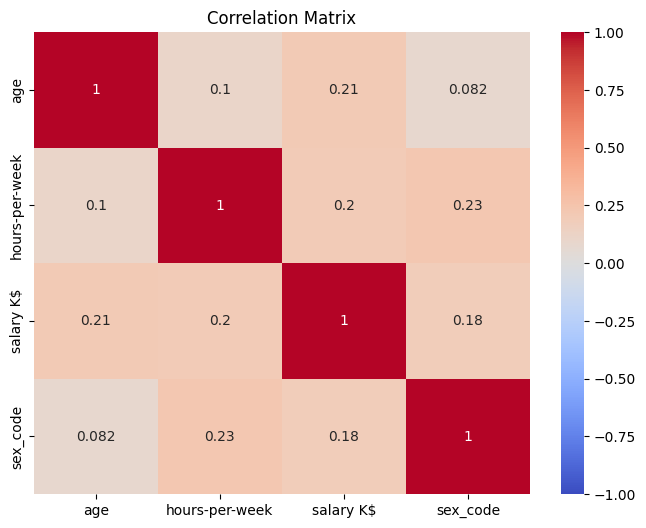

In [100]:
df["sex_code"] = df["sex"].map({"Male": 1, "Female": 0})
correlation_matrix = df[["age", "hours-per-week", "salary K$", "sex_code"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()